<a href="https://colab.research.google.com/github/Polina-Kireeva/ML_assignment_Morello_Kireeva/blob/main/MushroomML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-09-breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis on Mushrooms' Edibility - Can I eat it?

**Goal**: This dataset provides information regarding 61069 hypothetical mushrooms with caps based on 173 species and classified as: edible, poisonous or unknown edibility.

The goal is to train the algorithms to classify mushrooms as edible or not edible (the latter category including both poisonous and ones of unknown edibility).

**Link**: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

# Setup

In [ ]:
!pip install flaml[automl]
!pip install numpy==1.26.4

In [ ]:
# Import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O and data manipulation
import matplotlib.pyplot as plt # this is used to plot graphs
import seaborn as sns # plotting interactive graphs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # check the accuracy of the model
from flaml import AutoML # define the best algorithm based on budget
import random
import os

# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# read data
df = pd.read_csv("secondary_data.csv", sep=";")

# **Data Understanding**

There are 61069 observations with 21 features.

In [ ]:
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
# Evaluate the presence of null values and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

# Data Preparation

In [ ]:
#The columns with few non-null values were dropped as they are not represented enough to be meaningful for analysis
df = df.drop(columns=['stem-root','veil-type','veil-color','spore-print-color','stem-surface'])

<Axes: >

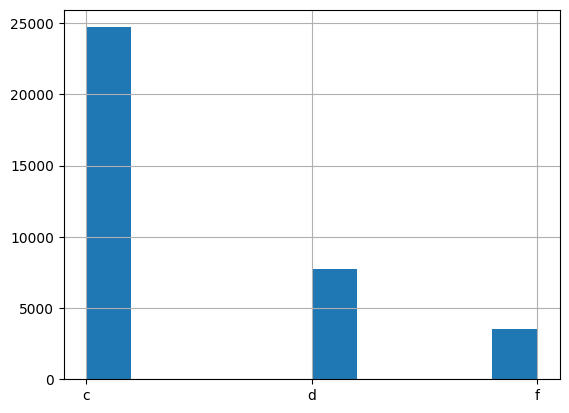

In [ ]:
#The feature "gill spacing" is missing 59% of the values and the histogram shows a predominance of the value "c" (close spacing)
df["gill-spacing"].value_counts()
df["gill-spacing"].hist()

In [ ]:
#The feature was dropped because of the high number of missing values.
df=df.drop(columns=["gill-spacing"])

<Axes: >

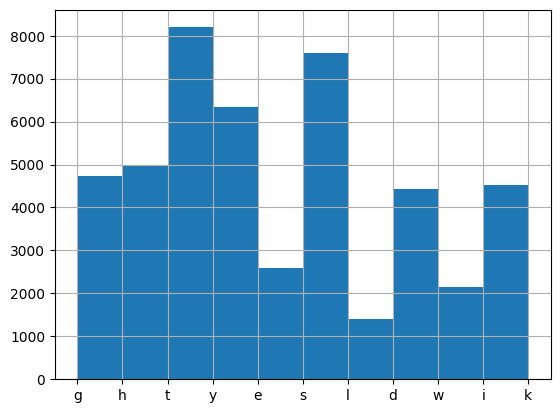

In [ ]:
#The feature "cap-surface" is missing 23% of the total value, it is possible to do imputation of missing value that respect this distribution but it is still too high.
df["cap-surface"].value_counts()
df["cap-surface"].hist()


In [ ]:
#The feature was dropped.
df=df.drop(columns=["cap-surface"])

<Axes: >

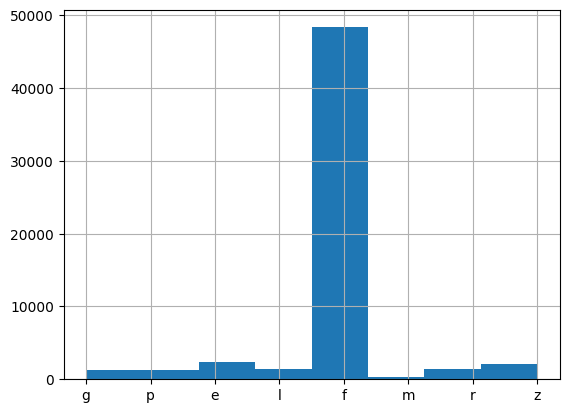

In [ ]:
#The feature "Ring-type" has a majority of "f" value (the encoding for "None"), evaluating dropping the feature.
df["ring-type"].value_counts()
df["ring-type"].hist(bins=8)

In [ ]:
#The feature "Ring-type" was dropped.
df=df.drop(columns=["ring-type"])

<Axes: >

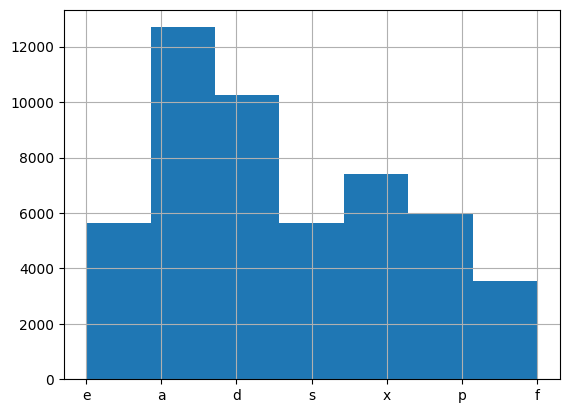

In [ ]:
df["gill-attachment"].value_counts()
df["gill-attachment"].hist(bins=7)

In [ ]:
#Despite being the feature with less missing imputations (17%), it still represents a percentage too high to ignore so it must be dropped.
df=df.drop(columns=["gill-attachment"])

In [ ]:
#Features that can be encoded as 0,1 are: class; does-bruise-bleed; veil-type; has-ring.
edible_map = {'p': 0,'e': 1}
df['class_encoded'] = df['class'].map(edible_map)
true_map = {'f': 0,'t': 1}
df['bruise_or_bleed_encoded'] = df['does-bruise-or-bleed'].map(true_map)
df['has_ring_encoded'] = df['has-ring'].map(true_map)
df1 = df.drop(columns=['does-bruise-or-bleed','has-ring','class'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cap-diameter             61069 non-null  float64
 1   cap-shape                61069 non-null  object 
 2   cap-color                61069 non-null  object 
 3   gill-color               61069 non-null  object 
 4   stem-height              61069 non-null  float64
 5   stem-width               61069 non-null  float64
 6   stem-color               61069 non-null  object 
 7   habitat                  61069 non-null  object 
 8   season                   61069 non-null  object 
 9   class_encoded            61069 non-null  int64  
 10  bruise_or_bleed_encoded  61069 non-null  int64  
 11  has_ring_encoded         61069 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 5.6+ MB


In [ ]:
df1.describe(include='all')

,cap-diameter,cap-shape,cap-color,gill-color,stem-height,stem-width,stem-color,habitat,season,class_encoded,bruise_or_bleed_encoded,has_ring_encoded
count,61069.000000,61069,61069,61069,61069.000000,61069.000000,61069,61069,61069,61069.000000,61069.000000,61069.000000
unique,NaN,7,12,12,NaN,NaN,13,8,4,NaN,NaN,NaN
top,NaN,x,n,w,NaN,NaN,w,d,a,NaN,NaN,NaN
freq,NaN,26934,24218,18521,NaN,NaN,22926,44209,30177,NaN,NaN,NaN
mean,6.733854,NaN,NaN,NaN,6.581538,12.149410,NaN,NaN,NaN,0.445087,0.173410,0.248555
std,5.264845,NaN,NaN,NaN,3.370017,10.035955,NaN,NaN,NaN,0.496979,0.378605,0.432179
min,0.380000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,3.480000,NaN,NaN,NaN,4.640000,5.210000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,5.860000,NaN,NaN,NaN,5.950000,10.190000,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,8.540000,NaN,NaN,NaN,7.740000,16.570000,NaN,NaN,NaN,1.000000,0.000000,0.000000


In [ ]:
# The object type features "cap-shape", "cap-color", "gill-color", "stem-color", "habitat","season" are nominal with no inherent order and should be changed as most
# models only support numerical variables as input.
# One-hot encoding (all categories represented) can be considered even though it increases the amount of features.
df_hot_encoded = pd.get_dummies(df1, columns=["cap-shape", "cap-color", "gill-color", "stem-color", "habitat", "season"])
print(f"One-Hot Encoded:\n{df_hot_encoded}\n")

One-Hot Encoded:
       cap-diameter  stem-height  stem-width  class_encoded  \
0             15.26        16.95       17.09              0   
1             16.60        17.99       18.19              0   
2             14.07        17.80       17.74              0   
3             14.17        15.77       15.98              0   
4             14.64        16.53       17.20              0   
...             ...          ...         ...            ...   
61064          1.18         3.93        6.22              0   
61065          1.27         3.18        5.43              0   
61066          1.27         3.86        6.37              0   
61067          1.24         3.56        5.44              0   
61068          1.17         3.25        5.45              0   

       bruise_or_bleed_encoded  has_ring_encoded  cap-shape_b  cap-shape_c  \
0                            0                 1        False        False   
1                            0                 1        False        F

In [ ]:
print(min(df_hot_encoded["cap-diameter"]), max(df_hot_encoded["cap-diameter"]))
print(min(df_hot_encoded["stem-height"]), max(df_hot_encoded["stem-height"]))
print(min(df_hot_encoded["stem-width"]), max(df_hot_encoded["stem-width"]))


0.38 62.34
0.0 33.92
0.0 103.91


In [ ]:
#the previous features need to be normalized
num_df = df_hot_encoded.iloc[:,:3]
normalized_df = (num_df - num_df.min()) / (num_df.max() - num_df.min())
normalized_df

,cap-diameter,stem-height,stem-width
0,0.240155,0.499705,0.164469
1,0.261782,0.530366,0.175055
2,0.220949,0.524764,0.170725
3,0.222563,0.464917,0.153787
4,0.230148,0.487323,0.165528
...,...,...,...
61064,0.012912,0.115861,0.059859
61065,0.014364,0.093750,0.052257
61066,0.014364,0.113797,0.061303
61067,0.013880,0.104953,0.052353


In [ ]:
concat_list = [normalized_df,df_hot_encoded.iloc[:,3:]]
preprocessed_df = pd.concat(concat_list, axis=1)
preprocessed_df

,cap-diameter,stem-height,stem-width,class_encoded,bruise_or_bleed_encoded,has_ring_encoded,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0.240155,0.499705,0.164469,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.261782,0.530366,0.175055,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0.220949,0.524764,0.170725,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.222563,0.464917,0.153787,0,0,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,0.230148,0.487323,0.165528,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.012912,0.115861,0.059859,0,0,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
61065,0.014364,0.093750,0.052257,0,0,0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
61066,0.014364,0.113797,0.061303,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
61067,0.013880,0.104953,0.052353,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
encoding_list = list(preprocessed_df.columns)[6:]
print(encoding_list)
truest_map = {False: 0,True: 1}
for i in encoding_list:
  preprocessed_df[f'{i}_encoded'] = preprocessed_df[i].map(truest_map)
preprocessed_df_numeric = preprocessed_df.drop(columns=encoding_list)

['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem-color_f', 'stem-color_g', 'stem-color_k', 'stem-color_l', 'stem-color_n', 'stem-color_o', 'stem-color_p', 'stem-color_r', 'stem-color_u', 'stem-color_w', 'stem-color_y', 'habitat_d', 'habitat_g', 'habitat_h', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w', 'season_a', 'season_s', 'season_u', 'season_w']


<Axes: >

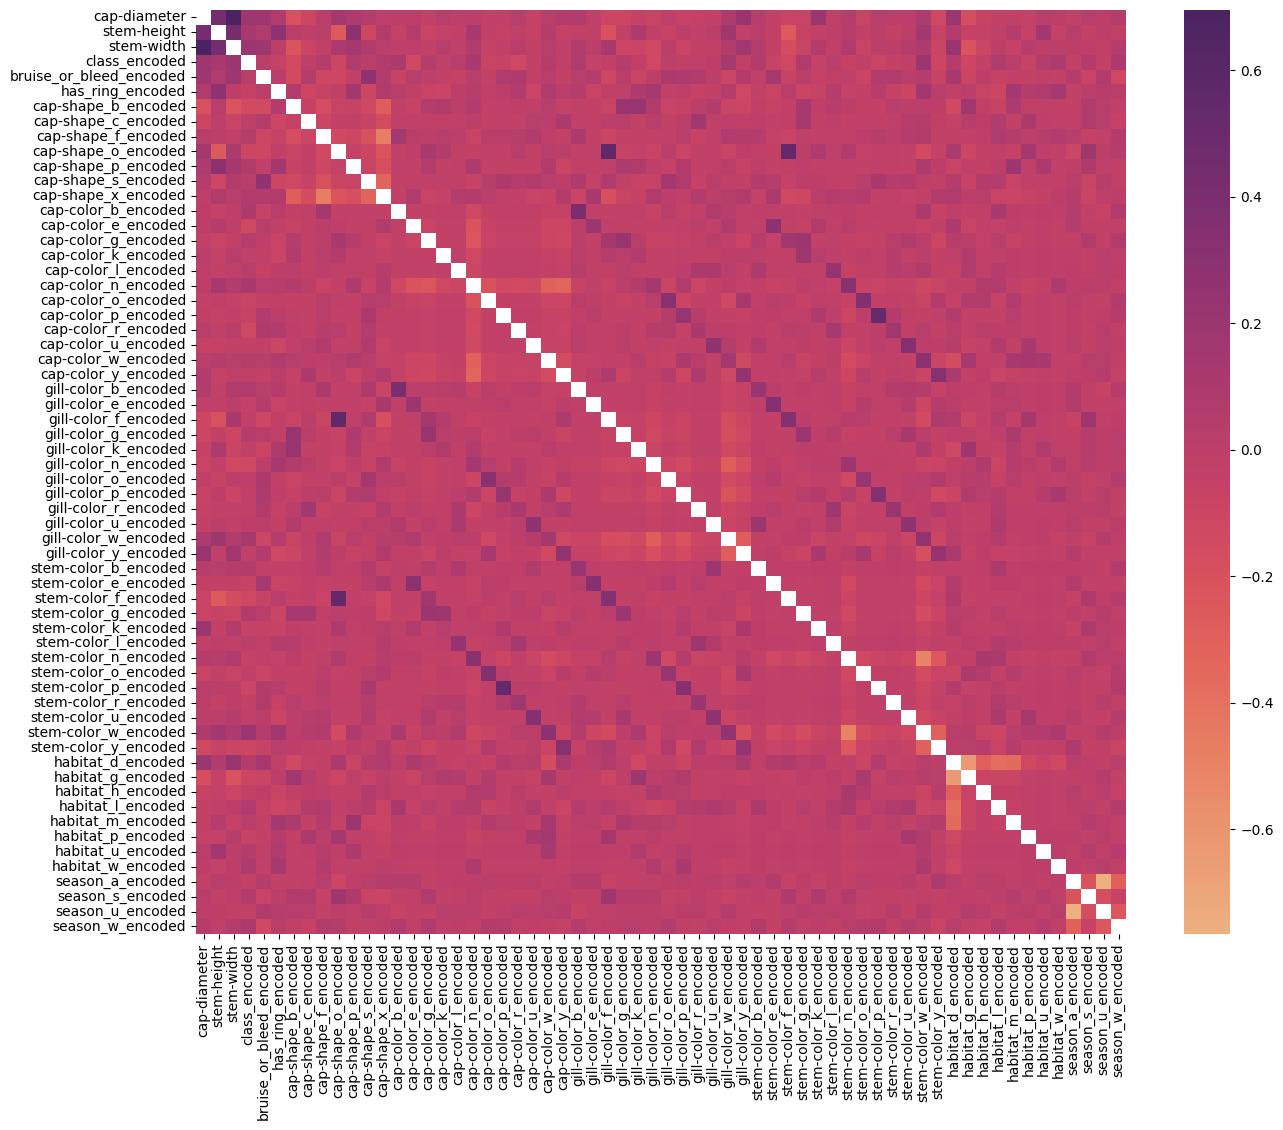

In [ ]:
# We create a correlation matrix to evaluate which parameters can be dropped.
rho = preprocessed_df_numeric.corr(method='pearson', numeric_only=True)
min_corr = 0
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(15, 12))
sns.heatmap(kot, cmap=sns.color_palette("flare", as_cmap=True))

<Axes: >

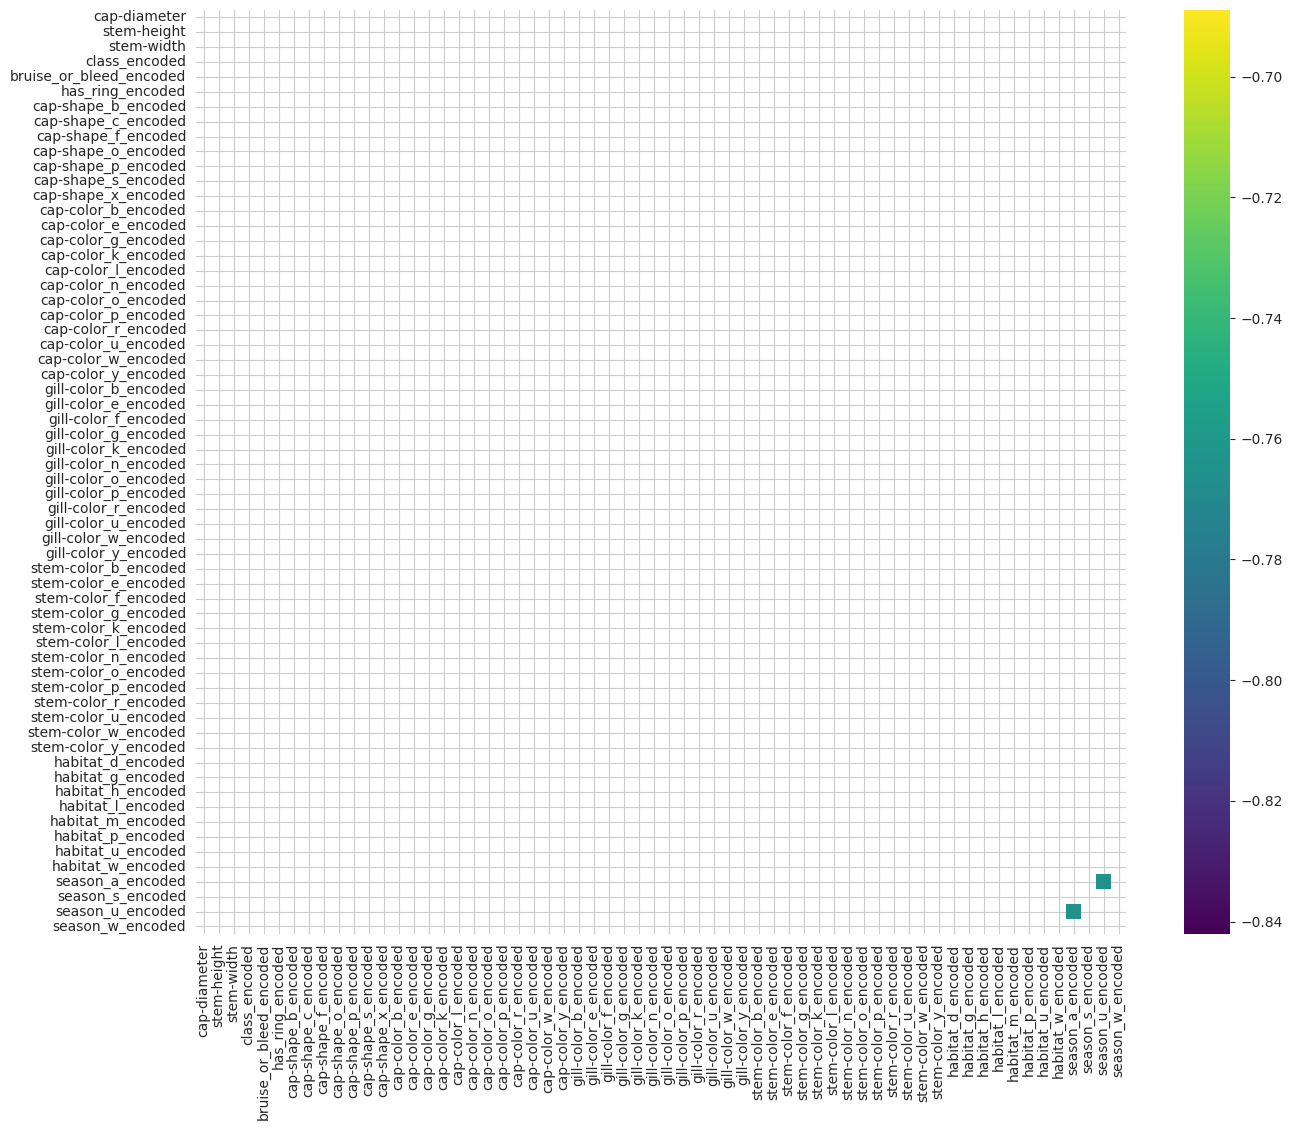

In [ ]:
#For clarity we highlight only the values over a threshold.
rho = preprocessed_df_numeric.corr(method='pearson', numeric_only=True)
min_corr = 0.75
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(15, 12))
sns.set_style("whitegrid")
sns.heatmap(kot, cmap=sns.color_palette("viridis", as_cmap=True))

In [ ]:
#The values with a correlation higher than 0.75 can be dropped.
p_df_n = preprocessed_df_numeric.drop(columns=['season_a_encoded'])

In [ ]:
#Profiling the data after the pre-processing phase.
p_df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cap-diameter             61069 non-null  float64
 1   stem-height              61069 non-null  float64
 2   stem-width               61069 non-null  float64
 3   class_encoded            61069 non-null  int64  
 4   bruise_or_bleed_encoded  61069 non-null  int64  
 5   has_ring_encoded         61069 non-null  int64  
 6   cap-shape_b_encoded      61069 non-null  int64  
 7   cap-shape_c_encoded      61069 non-null  int64  
 8   cap-shape_f_encoded      61069 non-null  int64  
 9   cap-shape_o_encoded      61069 non-null  int64  
 10  cap-shape_p_encoded      61069 non-null  int64  
 11  cap-shape_s_encoded      61069 non-null  int64  
 12  cap-shape_x_encoded      61069 non-null  int64  
 13  cap-color_b_encoded      61069 non-null  int64  
 14  cap-color_e_encoded   

# Modeling and Evaluation

In [ ]:
#Split the data into Training and Test Set.
y=p_df_n["class_encoded"]
#X=p_df_n.drop(columns=["class_encoded"]) # before removing 10 least important (for DT) features
X=p_df_n.drop(columns=['class_encoded', 'cap-color_k_encoded', 'gill-color_b_encoded', 'gill-color_u_encoded', 'habitat_w_encoded', 'stem-color_b_encoded', 'stem-color_f_encoded', 'stem-color_k_encoded', 'stem-color_l_encoded', 'stem-color_r_encoded', 'stem-color_u_encoded'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (48855, 50)
X_test: (12214, 50)
y_train: (48855,)
y_test: (12214,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48855 entries, 42308 to 56422
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cap-diameter             48855 non-null  float64
 1   stem-height              48855 non-null  float64
 2   stem-width               48855 non-null  float64
 3   bruise_or_bleed_encoded  48855 non-null  int64  
 4   has_ring_encoded         48855 non-null  int64  
 5   cap-shape_b_encoded      48855 non-null  int64  
 6   cap-shape_c_encoded      48855 non-null  int64  
 7   cap-shape_f_encoded      48855 non-null  int64  
 8   cap-shape_o_encoded      48855 non-null  int64  
 9   cap-shape_p_encoded      48855 non-null  int64  
 10  cap-shape_s_encoded      48855 non-null  int64  
 11  cap-shape_x_encoded      48855 non-null  int64  
 12  cap-color_b_encoded      48855 non-null  int64  
 13  cap-color_e_encoded      48855 non-null  int64  
 14  cap-color_g_encoded    

In [ ]:
from sklearn.metrics import accuracy_score
#A shallow decision tree as a baseline
clf = DecisionTreeClassifier(max_depth=2, random_state=seed) # Instantiate and fit the model (on the training set)
clf.fit(X_train, y_train) # Train the model
y_pred = clf.predict(X_test) # Predict new values
accuracy_score(y_test, y_pred) # Evaluate the model (on the test set)

0.6279679056820042

In [ ]:
print(clf.classes_)

[0 1]


[Text(0.5, 0.8333333333333334, 'stem-width <= 0.079\ngini = 0.494\nsamples = 48855\nvalue = [27048.0, 21807.0]\nclass = poisonous'),
 Text(0.25, 0.5, 'stem-color_e_encoded <= 0.5\ngini = 0.426\nsamples = 20772\nvalue = [14372, 6400]\nclass = poisonous'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.357\nsamples = 14959\nvalue = [11475, 3484]\nclass = poisonous'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 5813\nvalue = [2897, 2916]\nclass = edible'),
 Text(0.75, 0.5, 'cap-color_o_encoded <= 0.5\ngini = 0.495\nsamples = 28083\nvalue = [12676.0, 15407.0]\nclass = edible'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.491\nsamples = 26968\nvalue = [11654.0, 15314.0]\nclass = edible'),
 Text(0.875, 0.16666666666666666, 'gini = 0.153\nsamples = 1115\nvalue = [1022, 93]\nclass = poisonous')]

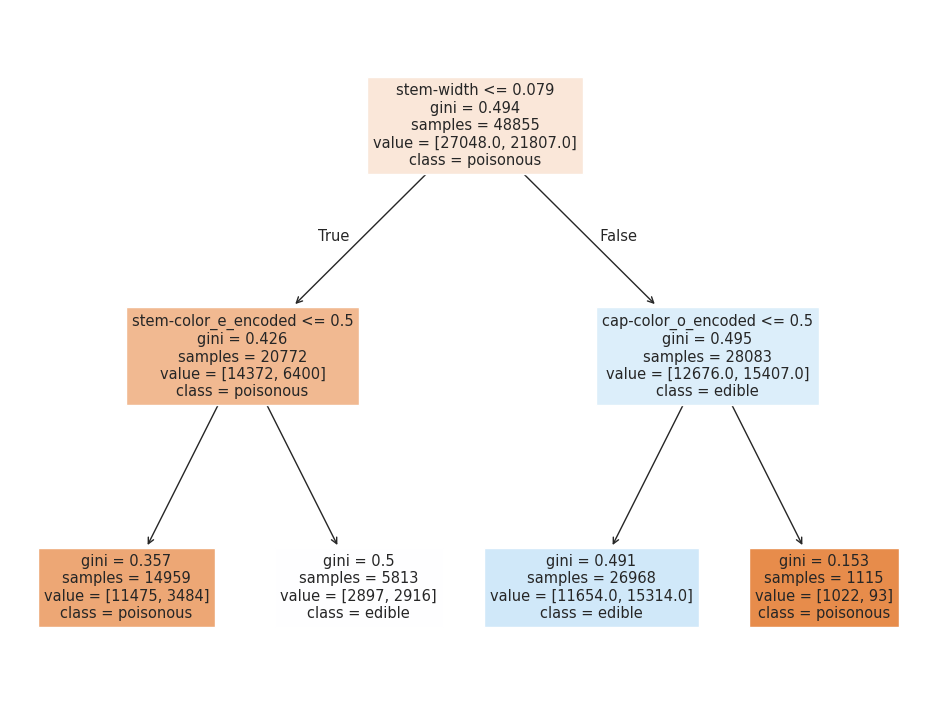

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 9))
plot_tree(clf, feature_names=p_df_n.columns, class_names=['poisonous', 'edible'], filled=True)


In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_}) # Create a DataFrame to display feature importance
feature_importance_df = feature_importance_df.sort_values(['Importance', 'Feature'], ascending=[False, True]) # Sort the DataFrame by importance in descending order
feature_importance_df # Display the feature importance


,Feature,Importance
2,stem-width,0.555096
38,stem-color_w_encoded,0.242955
19,cap-color_r_encoded,0.201950
3,bruise_or_bleed_encoded,0.000000
12,cap-color_b_encoded,0.000000
13,cap-color_e_encoded,0.000000
14,cap-color_g_encoded,0.000000
15,cap-color_l_encoded,0.000000
16,cap-color_n_encoded,0.000000
17,cap-color_o_encoded,0.000000


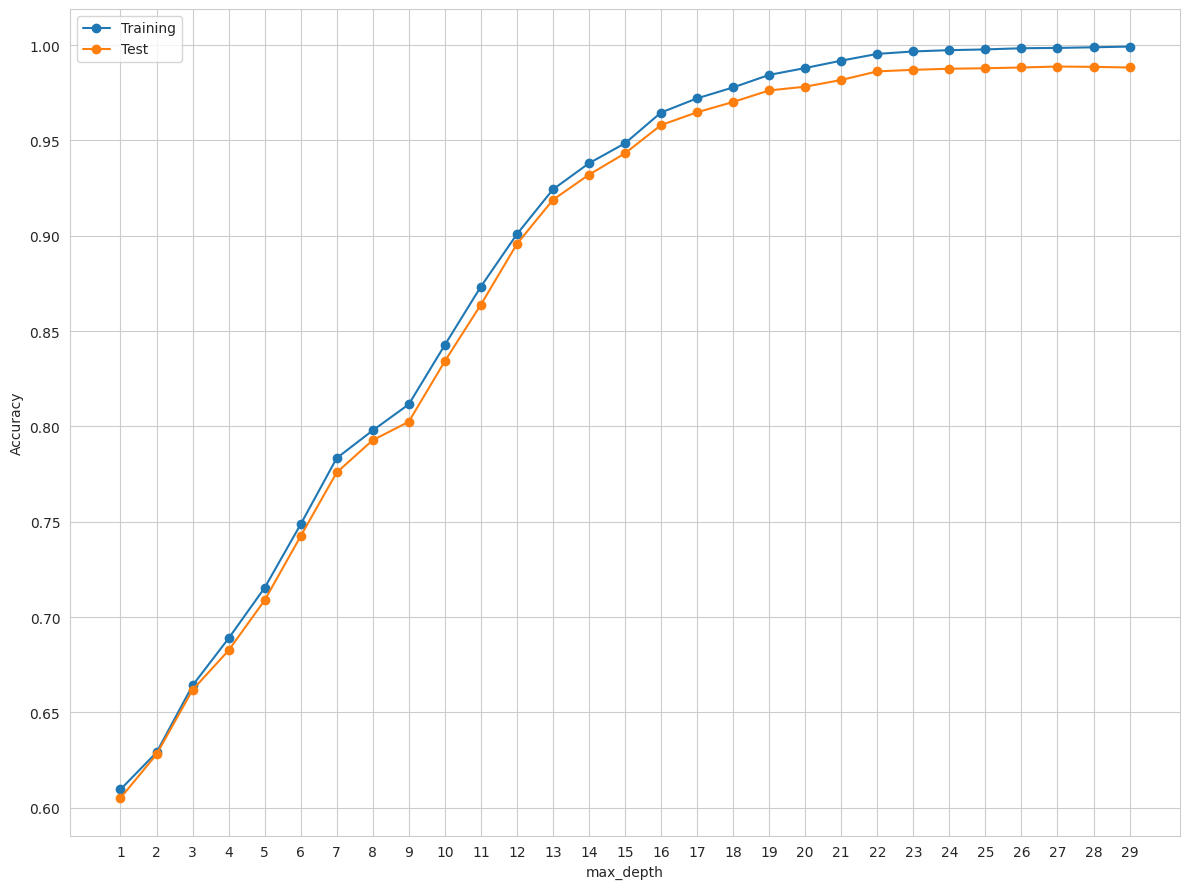

In [ ]:
# Prepare to store max_depth values and corresponding accuracies
max_depths = range(1, 30)
train_accuracies, test_accuracies = [], []
for max_depth in max_depths: # Train decision trees with increasing max_depth
  clf = DecisionTreeClassifier(max_depth=max_depth, random_state=seed)
  clf.fit(X_train, y_train)
  train_acc = accuracy_score(y_train, clf.predict(X_train)) # Compute accuracy for training set
  test_acc = accuracy_score(y_test, clf.predict(X_test)) # Compute accuracy for test set
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
# Plot accuracies
plt.figure(figsize=(12, 9))
plt.plot(max_depths, train_accuracies, label="Training", marker='o')
plt.plot(max_depths, test_accuracies, label="Test", marker='o')
plt.xticks(max_depths)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()


In [ ]:
# The decision tree with max depth of 13
clf = DecisionTreeClassifier(max_depth=13, random_state=seed) # Instantiate and fit the model (on the training set)
clf.fit(X_train, y_train) # Train the model
y_pred = clf.predict(X_test) # Predict new values
accuracy_score(y_test, y_pred) # Evaluate the model (on the test set)

0.9188635991485181

[Text(0.5985534786025145, 0.9642857142857143, 'stem-width <= 0.079\ngini = 0.494\nsamples = 48855\nvalue = [27048.0, 21807.0]\nclass = poisonous'),
 Text(0.2797011000967118, 0.8928571428571429, 'stem-color_e_encoded <= 0.5\ngini = 0.426\nsamples = 20772\nvalue = [14372, 6400]\nclass = poisonous'),
 Text(0.43912728934961315, 0.9285714285714286, 'True  '),
 Text(0.1755470261121857, 0.8214285714285714, 'stem-height <= 0.117\ngini = 0.357\nsamples = 14959\nvalue = [11475, 3484]\nclass = poisonous'),
 Text(0.11535904255319149, 0.75, 'gill-color_u_encoded <= 0.5\ngini = 0.07\nsamples = 3956\nvalue = [3812, 144]\nclass = poisonous'),
 Text(0.11149057059961315, 0.6785714285714286, 'cap-color_w_encoded <= 0.5\ngini = 0.053\nsamples = 3918\nvalue = [3812, 106]\nclass = poisonous'),
 Text(0.0953215667311412, 0.6071428571428571, 'stem-height <= 0.105\ngini = 0.044\nsamples = 3848\nvalue = [3762, 86]\nclass = poisonous'),
 Text(0.07458897485493231, 0.5357142857142857, 'stem-width <= 0.072\ngini = 0

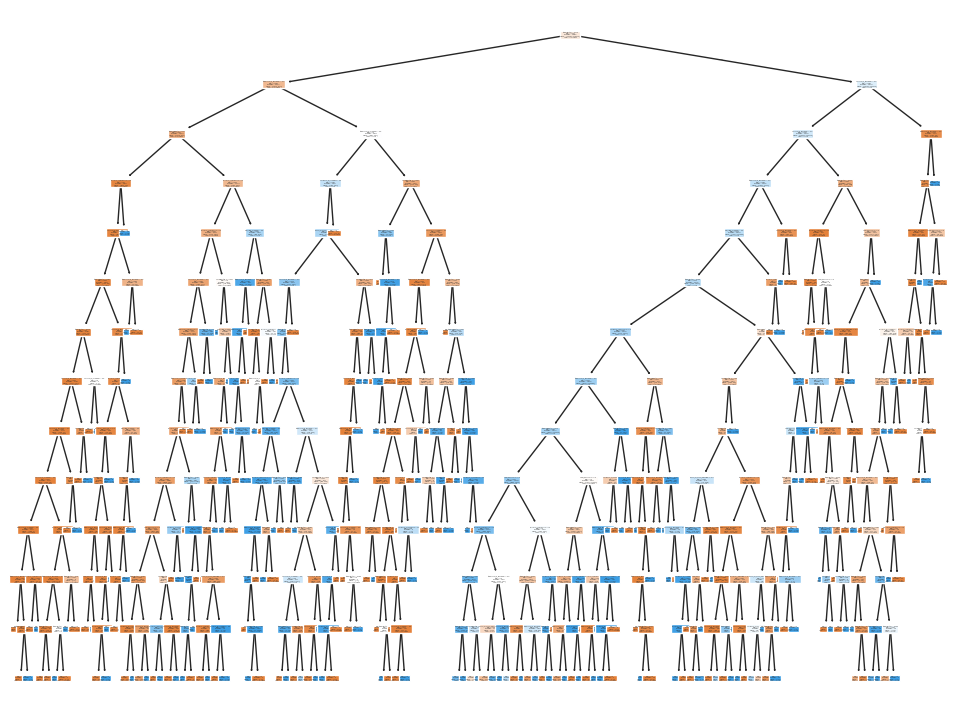

In [ ]:
plt.figure(figsize=(12, 9))
plot_tree(clf, feature_names=p_df_n.columns, class_names=['poisonous', 'edible'], filled=True)

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_}) # Create a DataFrame to display feature importance
feature_importance_df = feature_importance_df.sort_values(['Importance', 'Feature'], ascending=[False, True]) # Sort the DataFrame by importance in descending order
feature_importance_df # Display the feature importance

,Feature,Importance
2,stem-width,0.189317
1,stem-height,0.105084
0,cap-diameter,0.085381
38,stem-color_w_encoded,0.069997
3,bruise_or_bleed_encoded,0.053453
32,gill-color_y_encoded,0.053115
5,cap-shape_b_encoded,0.049043
4,has_ring_encoded,0.039036
34,stem-color_g_encoded,0.031302
13,cap-color_e_encoded,0.030486


In [ ]:
# This code was used to identify 10 features that have been removed in the train/test split section
# Features identified: ['cap-color_k_encoded', 'gill-color_b_encoded', 'gill-color_u_encoded', 'habitat_w_encoded', 'stem-color_b_encoded', 'stem-color_f_encoded', 'stem-color_k_encoded', 'stem-color_l_encoded', 'stem-color_r_encoded', 'stem-color_u_encoded']
zero_importance = feature_importance_df[feature_importance_df['Importance'] == 0]
print(zero_importance)
zero_features = zero_importance['Feature'].tolist()
print(zero_features)

                 Feature  Importance
26  gill-color_k_encoded         0.0
['gill-color_k_encoded']


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

def fit_forest(X_train, y_train, X_test, y_test):
    model=RandomForestClassifier(n_estimators=100, random_state=seed) # a simple random forest model
    model.fit(X_train, y_train) # now fit our model for training data
    y_pred = model.predict(X_test) # predict for the test data
    print(f"Accuracy: {metrics.accuracy_score(y_pred, y_test)}") # to check the accuracy
    featimp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nFeatures sorted by descending importance:")
    print(featimp) # this is the property of Random Forest classifier that it provides us the importance of the features used

fit_forest(X_train, y_train, X_test, y_test)

Accuracy: 0.9956607172097592

Features sorted by descending importance:
stem-width                 0.157431
stem-height                0.115901
cap-diameter               0.107792
bruise_or_bleed_encoded    0.047261
stem-color_w_encoded       0.040837
has_ring_encoded           0.040298
gill-color_w_encoded       0.026136
gill-color_y_encoded       0.022572
cap-shape_x_encoded        0.022133
cap-color_n_encoded        0.021954
cap-shape_b_encoded        0.020866
stem-color_n_encoded       0.019532
cap-color_e_encoded        0.017917
gill-color_n_encoded       0.016816
habitat_d_encoded          0.016717
cap-shape_f_encoded        0.013957
cap-shape_c_encoded        0.013923
season_w_encoded           0.013829
gill-color_f_encoded       0.013785
cap-color_y_encoded        0.013595
cap-color_r_encoded        0.013421
gill-color_p_encoded       0.013289
stem-color_y_encoded       0.012961
gill-color_g_encoded       0.012875
cap-color_w_encoded        0.012837
cap-shape_s_encoded        0

In [ ]:
# AutoML
def auto_ml(max_iter=300):
    automl = AutoML()
    settings = {
        "time_budget": 60,  # in seconds (-1 = unlimited)
        "max_iter": max_iter,  # maximum iterations of the search
        "metric": 'accuracy',
        "task": 'classification',
        "seed": seed
    }
    automl.fit(X_train=X_train, y_train=y_train, **settings)  # Search for the best model and hyperparameters
    y_pred = automl.predict(X_test)  # Make predictions on the test set
    return automl, y_pred

automl, y_pred = auto_ml(300)

[flaml.automl.logger: 11-26 13:48:26] {1752} INFO - task = classification
[flaml.automl.logger: 11-26 13:48:26] {1763} INFO - Evaluation method: holdout
[flaml.automl.logger: 11-26 13:48:26] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 11-26 13:48:26] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 11-26 13:48:26] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-26 13:48:26] {2417} INFO - Estimated sufficient time budget=4105s. Estimated necessary time budget=95s.
[flaml.automl.logger: 11-26 13:48:26] {2466} INFO -  at 0.6s,	estimator lgbm's best error=0.4464,	best estimator lgbm's best error=0.4464
[flaml.automl.logger: 11-26 13:48:26] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-26 13:48:26] {2466} INFO -  at 0.6s,	estimator lgbm's best error=0.4464,	best estimator lgbm's best error=0.4464
[flaml.automl.logger: 

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 11-26 13:48:27] {2466} INFO -  at 1.2s,	estimator sgd's best error=0.4241,	best estimator lgbm's best error=0.1991
[flaml.automl.logger: 11-26 13:48:27] {2282} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 11-26 13:48:27] {2466} INFO -  at 1.4s,	estimator lgbm's best error=0.0505,	best estimator lgbm's best error=0.0505
[flaml.automl.logger: 11-26 13:48:27] {2282} INFO - iteration 8, current learner xgboost
[flaml.automl.logger: 11-26 13:48:27] {2466} INFO -  at 1.5s,	estimator xgboost's best error=0.4464,	best estimator lgbm's best error=0.0505
[flaml.automl.logger: 11-26 13:48:27] {2282} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 11-26 13:48:27] {2466} INFO -  at 1.7s,	estimator lgbm's best error=0.0505,	best estimator lgbm's best error=0.0505
[flaml.automl.logger: 11-26 13:48:27] {2282} INFO - iteration 10, current learner lgbm
[flaml.automl.logger: 11-26 13:48:30] {2466} INFO -  at 4.3s,	estimator lgbm's best error=0.0168,	

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 11-26 13:49:23] {2466} INFO -  at 57.3s,	estimator lrl1's best error=0.2786,	best estimator xgboost's best error=0.0035
[flaml.automl.logger: 11-26 13:49:23] {2282} INFO - iteration 107, current learner lrl1
[flaml.automl.logger: 11-26 13:49:24] {2466} INFO -  at 58.8s,	estimator lrl1's best error=0.2786,	best estimator xgboost's best error=0.0035
[flaml.automl.logger: 11-26 13:49:24] {2282} INFO - iteration 108, current learner lrl1
[flaml.automl.logger: 11-26 13:49:24] {2466} INFO -  at 59.1s,	estimator lrl1's best error=0.2748,	best estimator xgboost's best error=0.0035
[flaml.automl.logger: 11-26 13:49:24] {2282} INFO - iteration 109, current learner xgb_limitdepth
[flaml.automl.logger: 11-26 13:49:25] {2466} INFO -  at 59.2s,	estimator xgb_limitdepth's best error=0.0119,	best estimator xgboost's best error=0.0035
[flaml.automl.logger: 11-26 13:49:25] {2282} INFO - iteration 110, current learner rf
[flaml.automl.logger: 11-26 13:49:25] {2466} INFO -  at 59.3s,

In [ ]:
automl.model.estimator

XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.969129617566699, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.18903514812531216,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=105,
              min_child_weight=0.03192525889753918, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=264,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9959063369903389